In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
import seaborn as sns 
import statsmodels

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\Học\NCKH\Bond-VN.csv', index_col= 0,parse_dates=True)


In [5]:
df.describe()

,GGVF1Y,GGVF3Y,GGVF5Y,CPI,FER,Baserate,Oilrate,FIR,Stockreturn,Fiscal,Pubdebt,CurrentAcc
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.071499,0.076911,0.080716,0.601198,3.113248e+10,8.885802,0.311347,1.479954,0.764756,-2.879439,50.436752,-0.392593
std,0.036271,0.034570,0.033162,0.793960,1.633594e+10,1.085656,9.146518,1.826785,8.797782,1.856116,6.870214,5.182574
min,0.015500,0.018380,0.020000,-0.756000,1.246660e+10,7.000000,-32.621224,0.310000,-24.009196,-5.027260,38.406899,-11.000000
25%,0.043233,0.049960,0.054277,0.131250,1.644710e+10,8.500000,-5.505606,0.375000,-3.245701,-4.260530,45.166601,-3.800000
50%,0.067000,0.076030,0.080000,0.404500,2.589349e+10,9.000000,0.659066,0.500000,0.774177,-3.481840,51.674497,2.100000
75%,0.092365,0.097433,0.100880,0.831250,3.652729e+10,9.000000,6.274829,2.000000,4.193213,-0.897920,57.097769,2.900000
max,0.211670,0.206670,0.203330,3.912000,6.881210e+10,14.000000,29.714398,9.000000,38.517100,1.224610,59.662135,6.000000


# Linear Regression (OLS)

In [6]:
y = df.GGVF5Y
x = df[['CPI','FER','Baserate', 'Oilrate', 'FIR', 'Stockreturn','Fiscal', 'Pubdebt', 'CurrentAcc']]

In [7]:
x,y = np.array(x), np.array(y)
x = sm.add_constant(x)

In [8]:
n_state = 10
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state=n_state) 

In [9]:
linear_regression_model = sm.OLS(y_train,x_train).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     90.35
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           8.57e-45
Time:                        21:05:50   Log-Likelihood:                 350.77
No. Observations:                 113   AIC:                            -681.5
Df Residuals:                     103   BIC:                            -654.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1018      0.019      5.313      0.0

***=> Oilrate, Stockreturn, Fiscal và CurrentAcc không có ý nghĩa thống kê. Tuy nhiên ta không thể loại bỏ các biến này được. Ta cần kiểm tra sự phụ thuộc của chúng vào các biến độc lập khác.***

# Đa cộng tuyến

<ipython-input-10-9b6adfa45a79>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


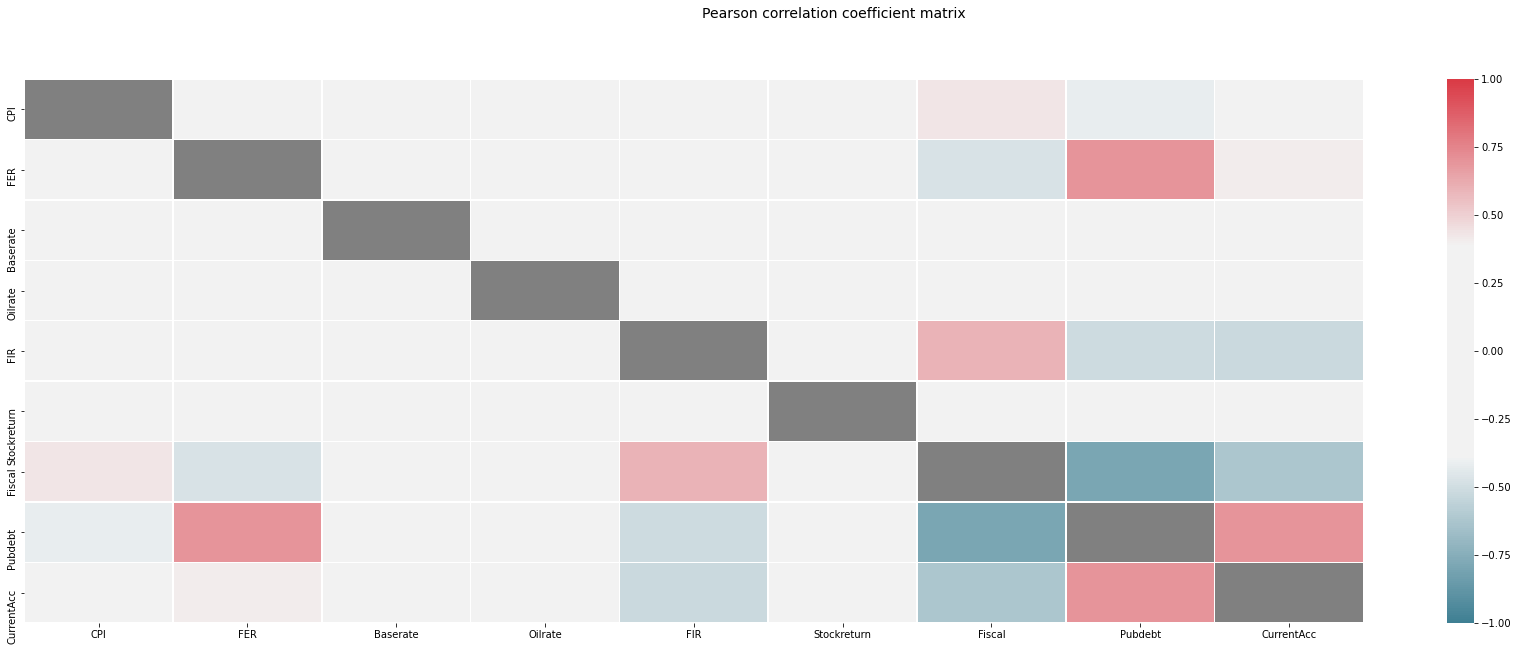

In [10]:
corr = df[['CPI','FER','Baserate', 'Oilrate', 'FIR', 'Stockreturn','Fiscal', 'Pubdebt', 'CurrentAcc']].corr()
# print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

# Tự tương quan

In [11]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(linear_regression_model.resid)

print('Durbin-Watson:', durbinWatson,'\n')
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.002738896747307 

Little to no autocorrelation 

Assumption satisfied


# Kiểm định Ramsey

In [12]:
# Kiểm định Ramsey
ramsey_test = statsmodels.stats.diagnostic.linear_reset(linear_regression_model, power=2, test_type='fitted')
print(f'P-value of Ramsey test: {ramsey_test.pvalue}')

P-value of Ramsey test: 1.7734412450343793e-05


***Vậy với α = 0,1 và P-value < 0.1, mô hình gốc không có sự thiếu biến.***

***Trực quan hóa***

In [13]:
prediction_result = linear_regression_model.predict(x_test)

In [14]:
table_1 = pd.DataFrame({'Real': y_test,
                        'Prediction':prediction_result})

In [15]:
table_1.head(10)


,Real,Prediction
0,0.09328,0.090737
1,0.04708,0.049377
2,0.11023,0.096983
3,0.19940,0.177252
4,0.07900,0.076270
5,0.06386,0.074036
6,0.04940,0.046067
7,0.07158,0.080314
8,0.12750,0.117985
9,0.05954,0.076404


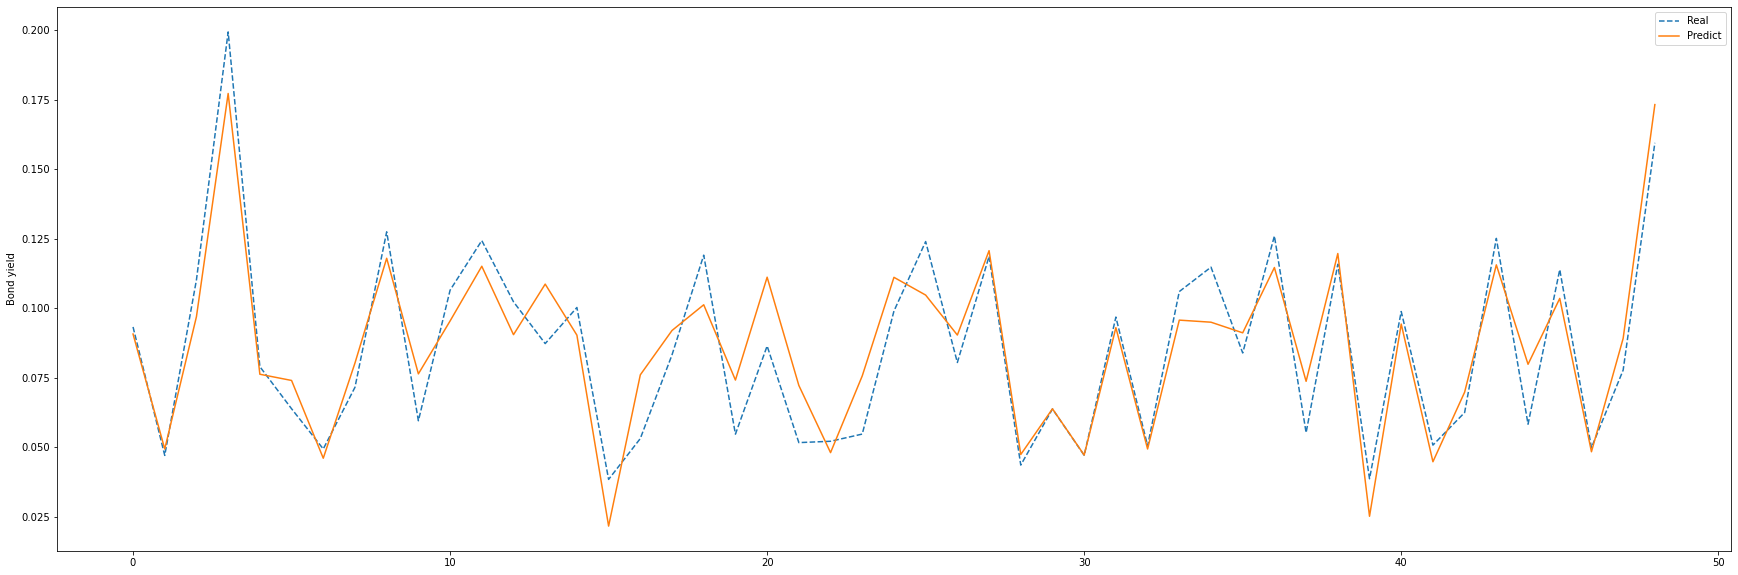

In [16]:
plt.figure(figsize=(30,10))

plt.plot(y_test,'--')
plt.plot(prediction_result)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(table_1.Real, table_1.Prediction))
mae = mean_absolute_error(table_1.Real, table_1.Prediction)
mape = (mean_absolute_percentage_error(table_1.Real, table_1.Prediction))*100

In [18]:
print(f'RMSE = {round(rmse,2)}')
print(f'MAE  = {round(mae,2)}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.01
MAE  = 0.01
MAPE = 14.53%


# Decision Tree Regressor

In [19]:
decision_tree = DecisionTreeRegressor(random_state=n_state)
decision_tree.fit(x_train, y_train);

In [20]:
pred_decision_tree = decision_tree.predict(x_test)
result_decision_tree = pd.DataFrame({'Real': y_test, 'Prediction': pred_decision_tree})

result_decision_tree.head(7)

,Real,Prediction
0,0.09328,0.09161
1,0.04708,0.04610
2,0.11023,0.10429
3,0.19940,0.16475
4,0.07900,0.08250
5,0.06386,0.07150
6,0.04940,0.05310


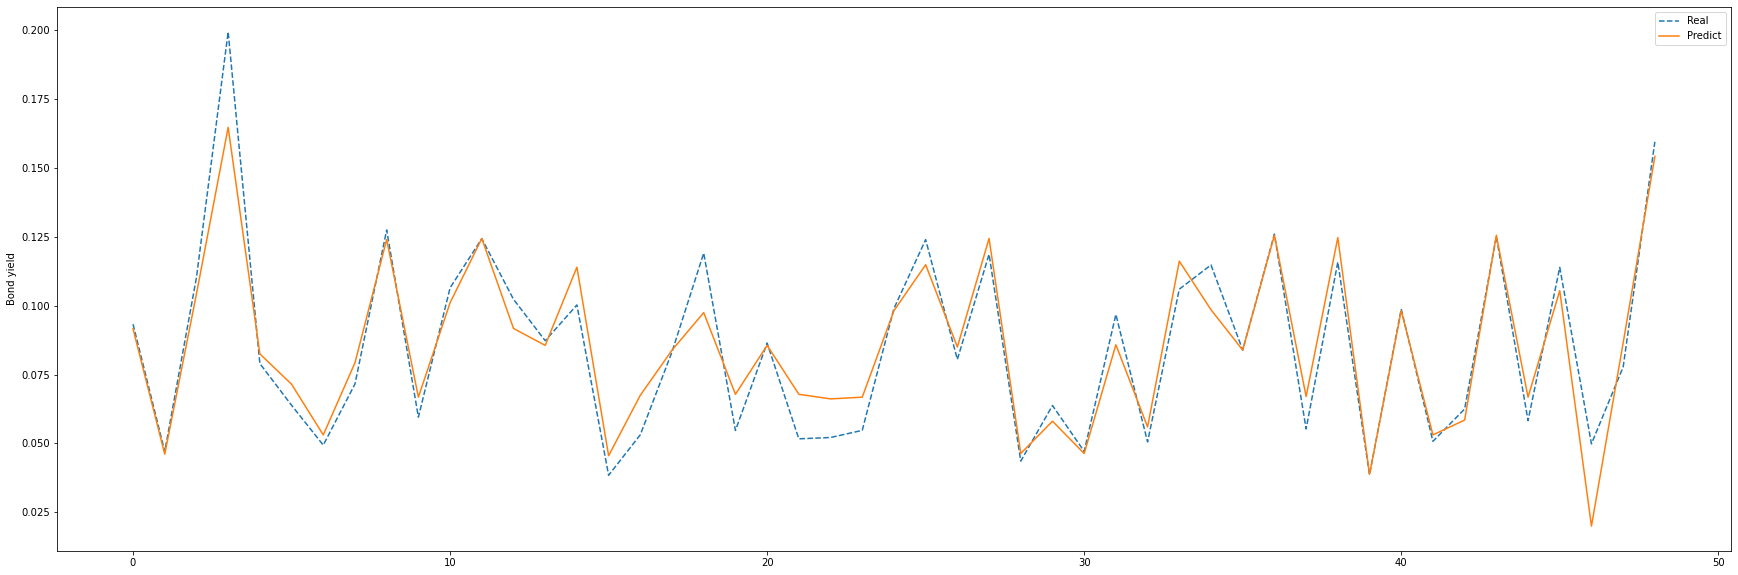

In [21]:
plt.figure(figsize=(30,10))

plt.plot(result_decision_tree.Real,'--')
plt.plot(result_decision_tree.Prediction)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')
plt.show()

In [22]:
rmse = np.sqrt(mean_squared_error(result_decision_tree.Real, result_decision_tree.Prediction))
mae = mean_absolute_error(result_decision_tree.Real, result_decision_tree.Prediction)
mape = (mean_absolute_percentage_error(result_decision_tree.Real, result_decision_tree.Prediction))*100

In [23]:
print(f'RMSE = {round(rmse,2)}')
print(f'MAE  = {round(mae,2)}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.01
MAE  = 0.01
MAPE = 10.13%


# Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

random_forest = RandomForestRegressor(random_state = n_state)
random_forest.fit(x_train, y_train);

random_forest_pred = random_forest.predict(x_test)

In [25]:
result_random_forest = pd.DataFrame({'Real': y_test, 'Prediction': random_forest_pred})

result_random_forest.head(7)

,Real,Prediction
0,0.09328,0.095245
1,0.04708,0.042029
2,0.11023,0.109874
3,0.19940,0.160182
4,0.07900,0.073560
5,0.06386,0.070986
6,0.04940,0.054388


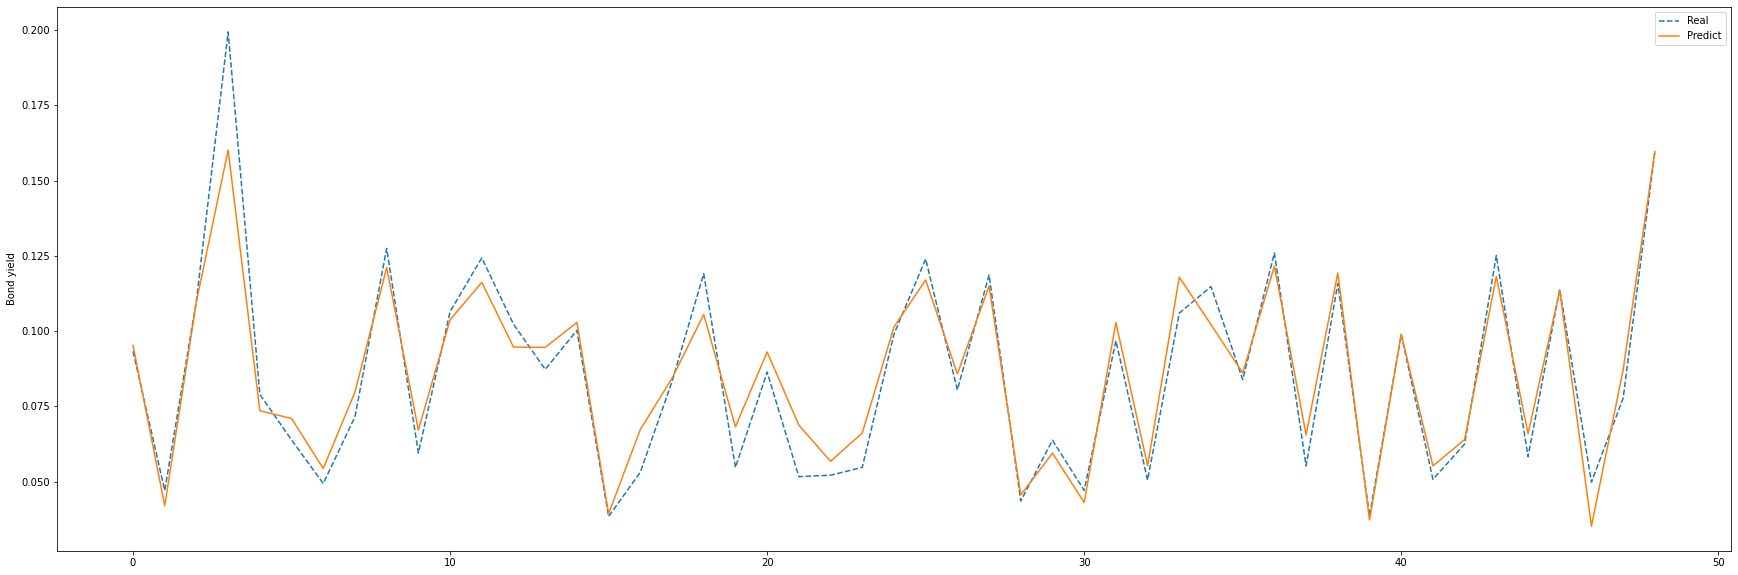

In [26]:
plt.figure(figsize=(30,10))

plt.plot(result_random_forest.Real,'--')
plt.plot(result_random_forest.Prediction)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(result_random_forest.Real, result_random_forest.Prediction))
mae = mean_absolute_error(result_random_forest.Real, result_random_forest.Prediction)
mape = (mean_absolute_percentage_error(result_random_forest.Real, result_random_forest.Prediction))*100

In [28]:
print(f'RMSE = {round(rmse,2)}')
print(f'MAE  = {round(mae,2)}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.01
MAE  = 0.01
MAPE = 8.85%
